In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pytreebank
from keras_preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from bert_embedding import BertEmbedding

Using TensorFlow backend.


In [2]:
x_train = np.load('data/x_train_tokenized.npy', allow_pickle=True)
y_train = np.load('data/y_train_int.npy', allow_pickle=True)
print(x_train.shape)
print(y_train.shape)

(8544,)
(8544,)


In [3]:
len_list = [len(i) for i in x_train]
max_len = max(len_list)
min_len = min(len_list)
print(str(max_len), str(min_len))

49 1


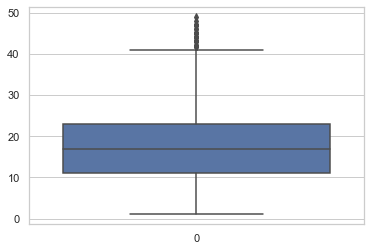

In [4]:
sns.set(style="whitegrid")
ax = sns.boxplot(data=len_list)
plt.show()

In [6]:
np.percentile(len_list, 1)

2.0

In [7]:
np.percentile(len_list, 99)

40.0

In [9]:
for x in x_train:
    if len(x) < 3:
        print(x)

['chomp', 'chomp']
['cool']
['imperfect']
['go']
['amazing']
['who', 'knew']
['bring', 'tissues']
['otherwise', 'maybe']
['insanely', 'hilarious']
['why']
['and', 'how']
['who', 'cares']
['ok', 'arthouse']
['a']
["c'mon"]
['renner']
['see', 'it']
['great', 'dragons']
['funny', 'though']
['bon', 'appétit']
['adam', 'sandler']
['buy', 'popcorn']
['or', 'both']
['and', 'educational']
['oh', 'james']
['yes', 'soar']
['hey', 'happy']
['almost']
['wow']
['no', 'laughs']
['or', 'intelligent']
['bond', 'inspired']
['certainly']
['big', 'time']
['ruh', 'roh']
['a', 'drama']
['a', 'romance']
['a', 'cartoon']
['yes']
['no']
['horrible']
['ending']
['he', 'fails']
['a', 'mess']
['thumbs', 'down']
['into', 'scrooge']
['too', 'bad']
['no', 'thanks']
['quelle', 'surprise']
['bravado', 'kathy']
['too', 'bad']
['action', 'mechanical']
['but', 'no']
['for', 'free']
['just', 'dreadful']
['bang']
['zoom']
['big', 'mistake']
['um', 'no']
['disturbing']
['disgusting']
['spy', 'vs']
['hey', 'arnold']
['that'

In [12]:
# filter shortest sentences out
print(len(y_train))
print(len(x_train))
y_x_filtered = [z for z in zip(y_train, x_train) if len(z[1]) > 2 and len(z[1]) < 40]
y_list, x_list = zip(*y_x_filtered)
len(x_list)

8544
8544


8302

### The below works for tokenized, i.e. numeric vectors, saved as numpy arrays

In [13]:
# pad_sequences is only for 1D representations of words! That's why we can't use it with vectors
padded = pad_sequences(x_list, maxlen=40, dtype='float32', padding='post')
padded.shape

ValueError: could not convert string to float: 'the'

In [ ]:
padded[0][1]

In [ ]:
padded[0][-1]

In [ ]:
padded[0].shape

In [ ]:
for i in padded:
    print(i.shape)
x_arr = np.asarray(padded)
y_arr = np.asarray(y_list)
print(x_arr.shape)
print(y_arr.shape)

### A few of the things I tried that didn't work

In [ ]:
def np_pad(sequences, shape):
    padded = np.zeros(shape)
    for s in sequences:
        padded = np.zeros(shape)
        padded[:s.shape[0],:s.shape[1]] = s

In [ ]:
# for np.pad() you cannot specify a desired shape, it will always add a constant number of zeros
for i in x_list:
    i = np.pad(i, (25, 768), 'constant')
    print(i.shape)